In [39]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
import time

a)
Crie uma função Python que avalie a seguinte expressão:

S=(1+1×10**-16)−1

Imprima o valor de S
 com `float` (precisão padrão do Python) e com `decimal.Decimal` com 50 dígitos de precisão.

O que você observa? Qual foi o valor computado? O que isso revela sobre o funcionamento da aritmética de ponto flutuante?

In [40]:
# Exemplo de definição de função em Python
def m_float():
    return float((1+1*10**(-16))-1)

print(m_float())


0.0


In [41]:
# Usando decimal.Decimal para 17 casas decimais
from decimal import Decimal, getcontext
getcontext().prec = 50

def m_decimal():
    s = (Decimal('1') + Decimal('1e-16')) - Decimal('1')
    return s

print(format(m_decimal(), '.17f'))

0.00000000000000010


b)
Implemente uma função que receba dois números muito próximos a
 e b
, e calcule:

- A diferença direta: a−b

- A média aritmética: (a+b)/2

Teste com:

- a=1.0000001
, b=1.0000000

- a=10**−8
, b=0

Compare os resultados obtidos com `float` e com `decimal.Decimal`.

In [42]:
def diferenca_arit(a, b):
    return a - b

print(diferenca_arit(1.0000001, 1.0000000))

def diferenca_media(a, b):
    return (a + b) / 2

print(diferenca_media(10**(-8), 0))

1.0000000005838672e-07
5e-09


In [43]:
def diferenca_arit_decimal(a, b):
    return Decimal(a) - Decimal(b)

def diferenca_media_decimal(a, b):
    return (Decimal(a) + Decimal(b)) / 2

print(diferenca_arit_decimal(1.0000001, 1.0000000))
print(diferenca_media_decimal(10**(-8), 0))

1.000000000583867176828789524734020233154296875E-7
5.000000000000000104612804150642363376633170446439E-9


c)
Crie um gráfico mostrando como o erro relativo na subtração (1+x)−1
 se comporta para valores de x
 entre 10−1
 e 10−16
. Use `numpy` e `matplotlib`.

O que acontece quando x
 se aproxima de zero?

d) (Exploração mais desafiadora)

Implemente uma função que calcule numericamente a derivada de f(x)=ln(x)
 no ponto x=1
, usando a fórmula da diferença finita progressiva:

f′(x)≈f(x+h)−f(x)h

- Calcule o erro absoluto em relação ao valor exato da derivada f′(1)=1
 para valores de h=10−1,10−2,…,10−16

- Plote o erro absoluto em função de h
 em escala log-log
- Identifique o intervalo de h
 em que o erro é minimizado e explique o motivo do aumento do erro para valores de h
 muito pequenos.

Reflexão:
Mesmo operações simples, como somar e subtrair, podem introduzir erros quando feitas com ponto flutuante. Este exercício mostra como números muito pequenos podem ser "perdidos" em meio a números grandes e como isso impacta a acuracidade dos cálculos. Além disso, aproximações numéricas como derivadas finitas devem equilibrar erro de truncamento com erro de arredondamento para obter resultados confiáveis.

# Questão 2

a) O problema: multiplicação escalar-vetor

Considere o problema de multiplicar cada elemento de um vetor por um número escalar α
:

yi=α⋅xipara i=1,2,…,N

Implemente isso em Python, de pelo menos duas maneiras:

1. Usando um laço `for` puro.
2. Usando uma abordagem vetorizada com `numpy`.



In [44]:
#maneira 1
maneira1 = range(0,100000000)

inicio = time.time()
for i in maneira1:
    i*2.5

fim = time.time()

print("Tempo de execução (s):", fim - inicio)

Tempo de execução (s): 11.14171290397644


In [45]:
#maneira 2
inicio = time.time()
maneira2 = np.arange(0, 10000000, 1)

for i in maneira2:
    i*2.5
fim = time.time()

print("Tempo de execução (s):", fim - inicio)

Tempo de execução (s): 15.374224185943604


b) Código em Fortran

O mesmo problema pode ser resolvido com o código `escala_vetor.f90`(arquivo separado).

Compile com:

```bash
gfortran -O2 escala_vetor.f90 -o escala_vetor
```

In [46]:
#Código Fortran

'''program escala_vetor
  implicit none
  integer, parameter :: N = 100000000
  real(8) :: x(N), y(N), alpha
  integer :: i
  real(8) :: t1, t2

  alpha = 2.5
  do i = 1, N
     x(i) = i * 1.0d0
  end do

  call cpu_time(t1)
  do i = 1, N
     y(i) = alpha * x(i)
  end do
  call cpu_time(t2)

  print *, "Tempo (s):", t2 - t1
end program escala_vetor'''


'program escala_vetor\n  implicit none\n  integer, parameter :: N = 100000000\n  real(8) :: x(N), y(N), alpha\n  integer :: i\n  real(8) :: t1, t2\n\n  alpha = 2.5\n  do i = 1, N\n     x(i) = i * 1.0d0\n  end do\n\n  call cpu_time(t1)\n  do i = 1, N\n     y(i) = alpha * x(i)\n  end do\n  call cpu_time(t2)\n\n  print *, "Tempo (s):", t2 - t1\nend program escala_vetor'

c) Comparando os tempos

- Meça o tempo de execução em Python (com `time.time()`) e em Fortran (com `cpu_time`).
- Execute para N=105,106,107,108
.
- Plote os tempos em escala log-log.
- Qual linguagem é mais rápida? Em quanto?


In [47]:
#maneira 1
maneirac11 = range(0,10**5)

inicio1 = time.time()
for i in maneirac11:
    i*2.5

fim1 = time.time()
mc11 = fim1 - inicio1
print("Tempo de execução (s):", fim1 - inicio1)


Tempo de execução (s): 0.0064029693603515625


In [48]:
#maneira 1
maneirac12 = range(0,10**6)

inicio2 = time.time()
for i in maneirac12:
    i*2.5

fim2 = time.time()
mc12 = fim2 - inicio2

print("Tempo de execução (s):", fim2 - inicio2)

Tempo de execução (s): 0.10819101333618164


In [49]:
#maneira 1
maneirac13 = range(0,10**7)

inicio3 = time.time()
for i in maneirac13:
    i*2.5

fim3 = time.time()
mc13 = fim3 - inicio3

print("Tempo de execução (s):", fim3 - inicio3)

Tempo de execução (s): 0.9895627498626709


In [50]:
#maneira 1
maneirac14 = range(0,10**8)

inicio4 = time.time()
for i in maneirac14:
    i*2.5

fim4 = time.time()
mc14 = fim4 - inicio4
print("Tempo de execução (s):", fim4 - inicio4)


Tempo de execução (s): 10.640399694442749


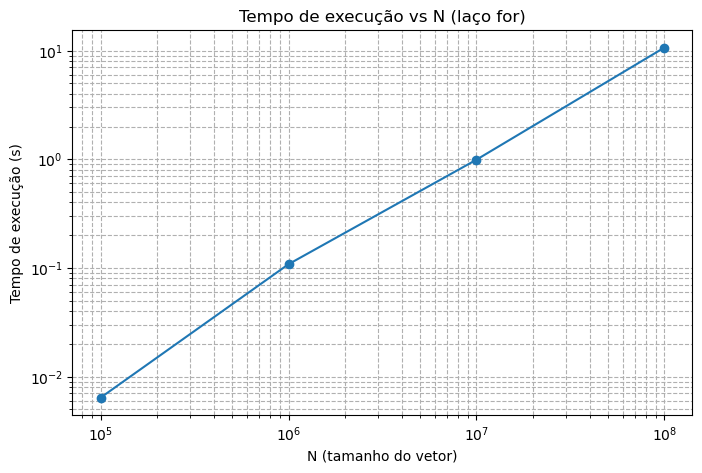

In [51]:
import matplotlib.pyplot as plt

# Valores de N e tempos de execução correspondentes
N = [10**5, 10**6, 10**7, 10**8]
tempos = [mc11, mc12, mc13, mc14]

plt.figure(figsize=(8,5))
plt.loglog(N, tempos, marker='o')
plt.xlabel('N (tamanho do vetor)')
plt.ylabel('Tempo de execução (s)')
plt.title('Tempo de execução vs N (laço for)')
plt.grid(True, which="both", ls="--")
plt.show()

Fortran


10*5

![alt text]({EF7E9245-C845-4B60-A156-555E09949544}.png)


10*6

![alt text]({4ED0EABF-07DB-46D2-A0C4-CB1F6E553277}.png)


10*7

![alt text]({1A491780-4778-4656-9B3A-3A9C86AF7D18}.png)


10*8

![alt text]({E383A537-2C1F-4D1A-A2CA-0E9F4333C94B}.png)

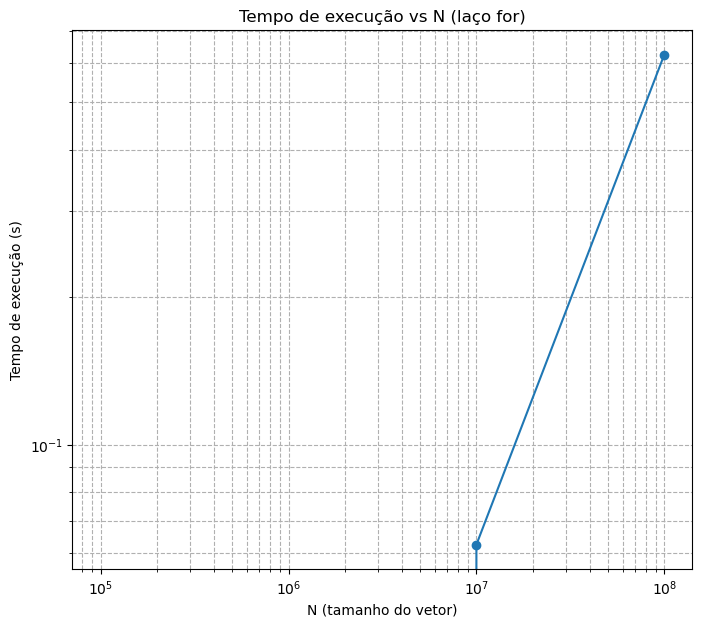

In [58]:
N = [10**5, 10**6, 10**7, 10**8]
lista_fortran = [0,0,6.25*(10**-2),0.625]

plt.figure(figsize=(8,7))
plt.loglog(N, lista_fortran, marker='o')
plt.xlabel('N (tamanho do vetor)')
plt.ylabel('Tempo de execução (s)')
plt.title('Tempo de execução vs N (laço for)')
plt.grid(True, which="both", ls="--")
plt.show()

d) (Exploração mais desafiadora)

Adapte a tarefa para fazer a soma de todos os produtos:

s=∑Ni=1α⋅xi

- Faça isso em Python com `for`, com `numpy.dot` e usando `numba` (se possível).
- Adapte o código Fortran para fazer a mesma coisa.
- Compare os tempos novamente.
- Discuta: o quanto o uso de bibliotecas otimizadas ou compiladores afeta o tempo de execução?

Tempo de execução (s): 0.017318248748779297
Tempo de execução (s): 0.16227960586547852
Tempo de execução (s): 1.6512837409973145
Tempo de execução (s): 15.58488655090332


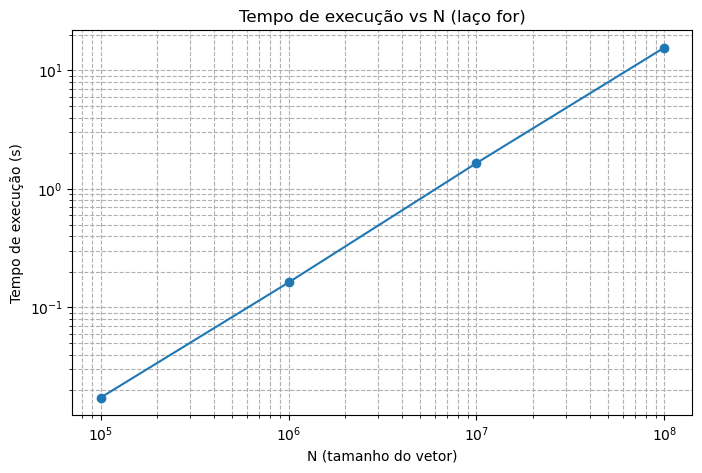

In [63]:
nd = 5

s = 0
tempos = []
N = [10**5, 10**6, 10**7, 10**8]

for i in range(0, 4):
    iniciod1 = time.time()
    for j in range(0,10**(nd+i)):
        s += 2.5*i
    fimd1 = time.time()
    tempos.append(fimd1 - iniciod1)
    print("Tempo de execução (s):", fimd1 - iniciod1)


import matplotlib.pyplot as plt

# Valores de N e tempos de execução correspondentes
N = [10**5, 10**6, 10**7, 10**8]

plt.figure(figsize=(8,5))
plt.loglog(N, tempos, marker='o')
plt.xlabel('N (tamanho do vetor)')
plt.ylabel('Tempo de execução (s)')
plt.title('Tempo de execução vs N (laço for)')
plt.grid(True, which="both", ls="--")
plt.show()